# 의사결정나무 (Decision Tree)

>**목차**
1. 개념정리
2. 불순도 (Impurity)
3. 정보 획득 (Information gain) 
4. 학습 과정
5. 실습



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import tree

## **1. 개념정리**
---


![](https://github.com/yebiny/Lecture_deeplearning_basic/blob/main/imgs/dt1.png?raw=true)

## **2. 불순도 (Impurity)**
---

### **Gini**
</br>

### <center>$Gini(p_A) = 1-\sum_{i=1}^{m}(p_{Ai})^2$</center>

In [ ]:
def gini(p_A):
  return 1-(np.sum((p_Ai**2) for p_Ai in p_A))

### **Entropy**

### <center>$Entropy(p_A) = -\sum_{i=1}^{m}p_{Ai} log_2(p_{Ai})$</center>

In [ ]:
def entropy(p_A):
  return -(np.sum(p_Ai*np.log2(p_Ai) for p_Ai in p_A))

### **예제**

![그림](https://github.com/yebiny/Lecture_deeplearning_basic/blob/main/imgs/bdt_%EB%B6%88%EC%88%9C%EB%8F%84.PNG?raw=true) </center>

* 데이터 정의

In [ ]:
p_a=[7/14, 7/14]
p_b=[3/14, 11/14]

* 불순도 계산

In [ ]:
print("* 지니:", gini(p_a), gini(p_b))
print("* 엔트로피:", entropy(p_a), entropy(p_b))

* 지니: 0.5 0.33673469387755106
* 엔트로피: 1.0 0.74959525725948


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  


## **3. 정보 획득 (Information gain)**
---
</br>

### <center>$ InformationGain = E_{parent}-w1 * E_{children1} - w2*E_{children2} - ...$</center>

<center>* $E_{parent}$: 부모의 엔트로피</center>

<center>* $E_{children}$: 자식의 엔트로피</center>

<center>* $w$: weighted average, 가중평균</center>



### **예제**

![](https://github.com/yebiny/Lecture_deeplearning_basic/blob/main/imgs/bdt_%EC%A0%95%EB%B3%B4%ED%9A%8D%EB%93%9D.PNG?raw=true)

* 영역 (a), (b), (c) 의 정의 

In [ ]:
p_a = [7/14,7/14]

p_b1 = [5/6, 1/6]
p_b2 = [2/8, 6/8]
w_b1 = 6/14
w_b2 = 8/14

p_c1 = [4/10, 6/10]
p_c2 = [1/4, 3/4]
w_c1 = 10/14
w_c2 = 4/14

* 영역 (a), (b), (c) 의 entropy 계산

In [ ]:
E_a = entropy(p_a)

E_b1 = entropy(p_b1)
E_b2 = entropy(p_b2)

E_c1 = entropy(p_c1)
E_c2 = entropy(p_c2)

print(E_a, E_b1, E_b2, E_c1, E_c2)

1.0 0.6500224216483541 0.8112781244591328 0.9709505944546686 0.8112781244591328


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  


* (a)와 (b) 사이의 정보획득량

In [ ]:
gain_a2b = E_a - w_b1*E_b1 - w_b2*E_b2
print(gain_a2b)

0.2578314624597724


* (a)와 (c) 사이의 정보획득량

In [ ]:
gain_a2c = E_a  - w_c1*E_c1 - w_c2*E_c2
print(gain_a2c)

0.07467011125834166


## **4. 학습과정**
---

|날짜|바람|습도|온도|날씨|
|---|---|---|---|---|
|1|약|높음|높음|비
|2|강|정상|낮음|맑음
|3|약|정상|낮음|맑음
|4|강|높음|낮음|비
|5|약|정상|높음|맑음
|6|강|높음|높음|비
|7|강|높음|낮음|맑음
|8|약|정상|낮음|맑음
|9|강|높음|높음|비
|10|강|높음|높음|비

### **과정1. Root 노드의 불순도(Entropy) 계산**
![](https://github.com/yebiny/Lecture_deeplearning_basic/blob/main/imgs/bdt_root.PNG?raw=true)

In [ ]:
p_root = [5/10,5/10]
E_root = entropy(p_root)
print(E_root)

1.0


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  


### **과정2. 각 속성별 자식 노드의 불순도(Entropy) 계산**

#### **바람**

![](https://github.com/yebiny/Lecture_deeplearning_basic/blob/main/imgs/bdt_wind.PNG?raw=true)

* 자식 노드 엔트로피 계산

In [ ]:
p_wind_is0 = [1/4,3/4]
E_wind_is0 = entropy(p_wind_is0)
print("* 바람이 약일때 노드의 엔트로피:",E_wind_is0)

p_wind_is1 = [4/6,2/6]
E_wind_is1 = entropy(p_wind_is1)
print("* 바람이 강일때 노드의 엔트로피:",E_wind_is1)

# 정보획득량 계산을 위한 값
w_wind_is0 = 4/10
w_wind_is1 = 6/10

* 바람이 약일때 노드의 엔트로피: 0.8112781244591328
* 바람이 강일때 노드의 엔트로피: 0.9182958340544896


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  


#### **습도**
![](https://github.com/yebiny/Lecture_deeplearning_basic/blob/main/imgs/bdt_humidity.PNG?raw=true)

* 자식 노드 엔트로피 계산

In [ ]:
p_humidity_is0 = [3/3]
E_humidity_is0 = entropy(p_humidity_is0)
print("* 습도 정상일때 노드의 엔트로피:",E_humidity_is0)

p_humidity_is1 = [5/7,2/7]
E_humidity_is1 = entropy(p_humidity_is1)
print("* 습도 높을때 노드의 엔트로피:",E_humidity_is1)

# 정보획득량 계산을 위한 값
w_humidity_is0 = 3/10
w_humidity_is1 = 7/10

* 습도 정상일때 노드의 엔트로피: -0.0
* 습도 높을때 노드의 엔트로피: 0.863120568566631


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  


#### **온도**

![](https://github.com/yebiny/Lecture_deeplearning_basic/blob/main/imgs/bdt_temp.PNG?raw=true)

* 자식 노드 엔트로피 계산

In [ ]:
p_temp_is0 = [1/5,4/5]
E_temp_is0 = entropy(p_temp_is0)
print("* 온도 >20 노드의 엔트로피:",E_temp_is0)

p_temp_is1 = [4/5,1/5]
E_temp_is1 = entropy(p_temp_is1)
print("* 온도 <=20 노드의 엔트로피:",E_temp_is1)

# 정보획득량 계산을 위한 값
w_temp_is0 = 5/10
w_temp_is1 = 5/10

* 온도 >20 노드의 엔트로피: 0.7219280948873623
* 온도 <=20 노드의 엔트로피: 0.7219280948873623


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  


### **과정3. 가장 높은 Information Gain을 가진 조건으로 먼저 분류**

### <center>$ InformationGain = E_{parent}-w1 * E_{children1} - w2*E_{children2} - ...$</center>

* 바람 조건의 정보획득량 계산

In [ ]:
information_gain_wind = E_root-w_wind_is0*E_wind_is0-w_wind_is1*E_wind_is1
print("* 바람으로 나눈 정보획득량: ", information_gain_wind)

* 바람으로 나눈 정보획득량:  0.12451124978365324


* 습도 조건의 정보획득량 계산

In [ ]:
information_gain_humidity = E_root-w_humidity_is0*E_humidity_is0-w_humidity_is1*E_humidity_is1
print("* 습도로 나눈 정보획득량: ", information_gain_humidity)

* 습도로 나눈 정보획득량:  0.3958156020033583


* 온도 조건의 정보획득량 계산

In [ ]:
information_gain_temp = E_root-w_temp_is0*E_temp_is0-w_temp_is1*E_temp_is1
print("* 온도로 나눈 정보획득량: ", information_gain_temp)

* 온도로 나눈 정보획득량:  0.2780719051126377


### **과정4. 모든 leaf 노드의 불순도가 0이 될때까지 2,3번 반복 수행**

![](https://github.com/yebiny/Lecture_deeplearning_basic/blob/main/imgs/bdt_%EC%8A%B5%EB%8F%84_%EB%B0%94%EB%9E%8C_%EC%98%A8%EB%8F%84.PNG?raw=true)



## **5. 실습**
---

### **데이터**

|날짜|바람|습도|온도|날씨|
|---|---|---|---|---|
|1|약|높음|높음|비
|2|강|정상|낮음|맑음
|3|약|정상|낮음|맑음
|4|강|높음|낮음|비
|5|약|정상|높음|맑음
|6|강|높음|높음|비
|7|강|높음|낮음|맑음
|8|약|정상|낮음|맑음
|9|강|높음|높음|비
|10|강|높음|높음|비

* 데이터 정의

In [ ]:
x = [[0,1,1],
     [1,0,0],
     [0,0,0],
     [1,1,0],
     [0,0,1],
     [1,1,1],
     [1,1,0],
     [0,1,0],
     [1,1,1],
     [1,1,1]]
y = [0,1,1,0,1,0,1,1,0,0]

x = np.array(x)
y = np.array(y)

* 데이터 다루기
![](https://github.com/yebiny/Lecture_deeplearning_basic/blob/main/imgs/bdt_node_datas.PNG?raw=true)

In [ ]:
node_a_mask = (x[:,1]==0) 
node_a = y[node_a_mask]
print(node_a)

node_b_mask = (x[:,1]==1) & (x[:,0]==0) 
node_b = y[node_b_mask]
print(node_b)

node_c_mask = (x[:,1]==1) & (x[:,0]==1) 
node_c = y[node_c_mask]
print(node_c)

node_d_mask = (x[:,1]==1) & (x[:,2]==0) 
node_d = y[node_d_mask]
print(node_d)

node_e_mask = (x[:,1]==1) & (x[:,2]==1) 
node_e = y[node_e_mask]
print(node_e)

[1 1 1]
[0 1]
[0 0 1 0 0]
[0 1 1]
[0 0 0 0]


### **sklearn 을 이용한 모델구현**

* 모델생성

In [ ]:
classifier = tree.DecisionTreeClassifier()

* 데이터 학습

In [ ]:
classifier.fit(x, y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

* 학습 결과

In [ ]:
predictions = classifier.predict(x)
print(classifier.score(x, y))

0.9


* 모델 시각화

[Text(133.92000000000002, 190.26, 'X[1] <= 0.5\ngini = 0.5\nsamples = 10\nvalue = [5, 5]'),
 Text(66.96000000000001, 135.9, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(200.88000000000002, 135.9, 'X[2] <= 0.5\ngini = 0.408\nsamples = 7\nvalue = [5, 2]'),
 Text(133.92000000000002, 81.53999999999999, 'X[0] <= 0.5\ngini = 0.444\nsamples = 3\nvalue = [1, 2]'),
 Text(66.96000000000001, 27.180000000000007, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(200.88000000000002, 27.180000000000007, 'gini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(267.84000000000003, 81.53999999999999, 'gini = 0.0\nsamples = 4\nvalue = [4, 0]')]

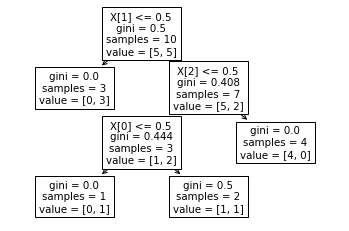

In [ ]:
tree.plot_tree(classifier)